In [43]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely import wkt

<Axes: >

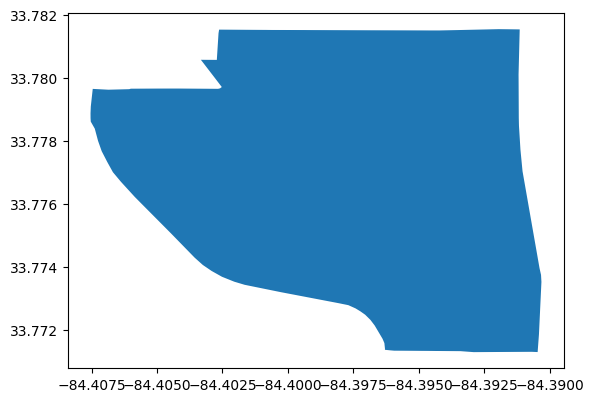

In [65]:
gdf = gpd.read_file("atl_pdi.geojson")

gatech_bg = gdf[gdf["GEOID"] == '131210010022']

gatech_i = gatech_bg.index

gatech_bg.plot()


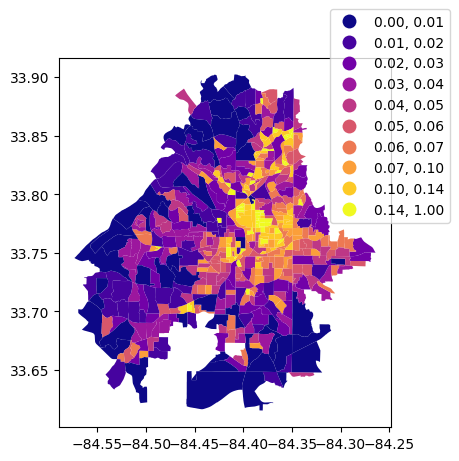

In [45]:
gdf = gpd.read_file("atl_pdi.geojson")
decile_labels, bins = pd.qcut(gdf["NORMPOPDENSITY"], 10, retbins=True, labels=None, duplicates="drop")

PDI = gdf["NORMPOPDENSITY"]



fig, ax = plt.subplots()


# gdf.plot(column='NORMPOPDENSITYdecile', cmap='virIDIs', legend=True, ax=ax)

# for loop to calc percentile inside of bins arg

gdf.plot(column='NORMPOPDENSITY', cmap='plasma', scheme="Quantiles", 
         legend=True, k=10,
         ax=ax, legend_kwds={'loc': 'upper right', 'bbox_to_anchor':(1.2, 1.15)})

plt.show()

<class 'numpy.float64'>


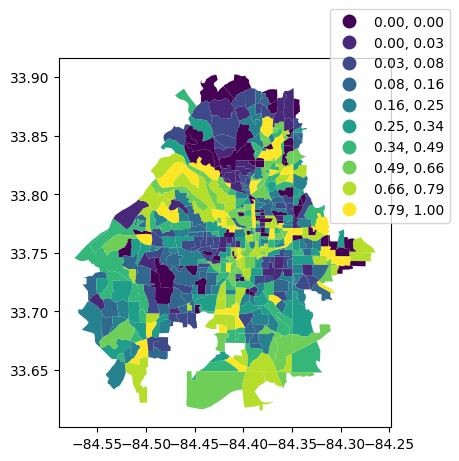

In [44]:
gdf = gpd.read_file("atl_LDI.geojson")
gdf = gdf.to_crs(epsg=4326)
decile_labels, bins = pd.qcut(gdf["LDI"], 10, retbins=True, labels=None, duplicates="drop")

print(type(gdf["LDI"][0]))

LDI = gdf["LDI"]

fig, ax = plt.subplots()

gdf.plot(column='LDI', cmap='viridis', scheme="Quantiles", 
         legend=True, k=10,
         ax=ax, legend_kwds={'loc': 'upper right', 'bbox_to_anchor':(1.2, 1.15)})

plt.show()

0      0.039435
1      0.020864
2      0.030765
3      0.251210
4      0.004568
         ...   
495    0.029044
496    0.062727
497    0.095593
498    0.028326
499    0.010751
Name: IDI, Length: 500, dtype: float64


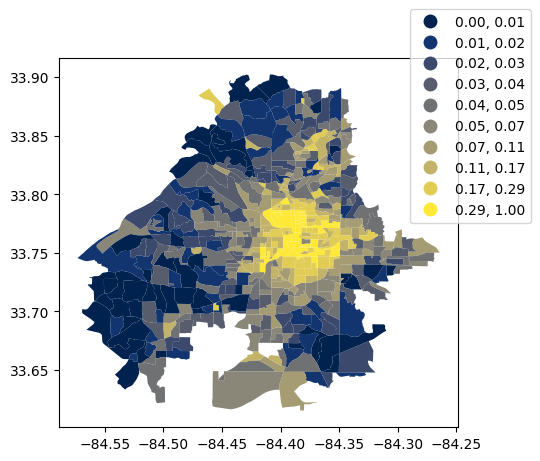

In [48]:
gdf = gpd.read_file("Atlanta_IDI_data.csv")

gdf['geometry'] = gdf['Polygon'].apply(wkt.loads)

gdf = gdf.set_geometry('geometry')

gdf["IDI"] = pd.to_numeric(gdf["IDI"],errors = 'coerce')

IDI = gdf["IDI"]

print(IDI)



fig, ax = plt.subplots()


# gdf.plot(column='LDIdecile', cmap='viridis', legend=True, ax=ax)

# for loop to calc percentile inside of bins arg


gdf.plot(column='IDI', cmap='cividis', scheme="Quantiles", 
         legend=True, k=10,
         ax=ax, legend_kwds={'loc': 'upper right', 'bbox_to_anchor':(1.2, 1.15)})

plt.show()


0.055731570251615736


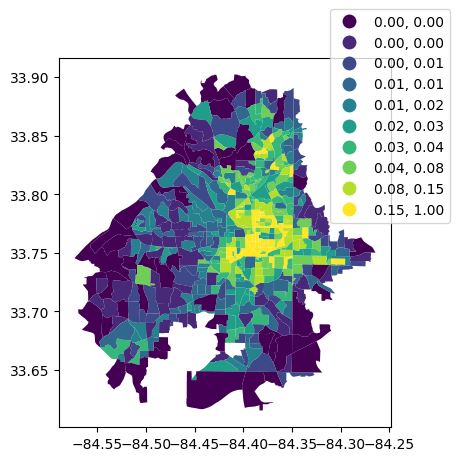

In [38]:
gdf = gpd.read_file("atl_CDI.geojson")

CDI = gdf["CDI"]

print(CDI.mean())

fig, ax = plt.subplots()

gdf.plot(column='CDI', cmap='viridis', scheme="Quantiles", 
         legend=True, k=10,  
         ax=ax, legend_kwds={'loc': 'upper right', 'bbox_to_anchor':(1.2, 1.15)})

plt.show()

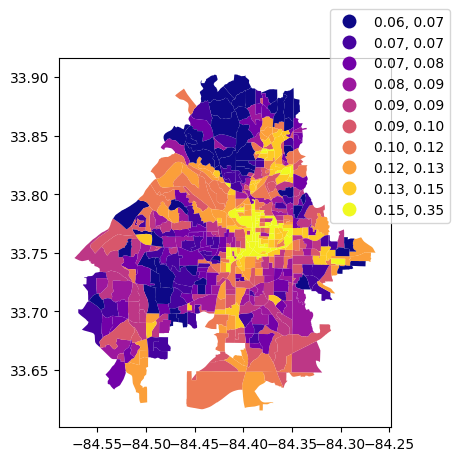

In [52]:
gdf = gpd.read_file("atl_bg.geojson")
PEI = ((1+PDI)*(1+IDI)*(1+LDI)*(1+CDI))/16
gdf["PEI"] = PEI

gdf.to_file('atl_PEI.geojson')



fig, ax = plt.subplots()

gdf.plot(column='PEI', cmap='plasma', scheme="Quantiles", 
         legend=True, k=10,
         ax=ax, legend_kwds={'loc': 'upper right', 'bbox_to_anchor':(1.2, 1.15)})

plt.show()

In [76]:
gatech_i

g_PDI = PDI[gatech_i]
g_CDI = CDI[gatech_i]
g_IDI = IDI[gatech_i]
g_LDI = LDI[gatech_i]

print(g_PDI, g_CDI, g_IDI, g_LDI)

print(PEI[gatech_i])

46    0.13904
Name: NORMPOPDENSITY, dtype: float64 46    0.130994
Name: CDI, dtype: float64 46    0.569431
Name: IDI, dtype: float64 46    0.631278
Name: LDI, dtype: float64
46    0.206134
dtype: float64
